# Problem Set 3

## Mridula Duggal

## Exercise 1 - Computing Transitions

$\underset{c_{t}}{ \max {}} E_{o}\left[\sum_{t=0}^\infty \beta_{t}u(c_{t})\right]$ <br>
$u(c_{t}) = ln c_{t}$ <br>
$c_{t} + i_{t}=y_{t}$ <br>
$y_{t} = k_{t}^{1 - \theta} (zh_{t})^{\theta}$ <br>
$i_{t}= k_{t+1}+ (1- \delta)k_{t}$

Let $\theta=0.67$ and $h_{t}=0.31$ for all t. Population does not grow. 

Let us now write the Lagrangian of the function, <br> <br>
$\sum_{t=0}^\infty \beta_{t}u(c_{t}) + \lambda(k_{t}^{1 - \theta} (zh_{t})^{\theta} - c_{t}-k_{t+1}+(1-\delta)k_{t})$ <br> <br>
Taking derivatives with respect to $c_{t}$, $c_{t+1}$ and $k_{t+1}$ <br> <br>
${c_{t}}: \frac{\beta^{t}}{c_{t}} = \lambda_{t}$ <br> <br>
${c_{t+1}}: \frac{\beta^{t+1}}{c_{t+1}} = \lambda_{t+1}$ <br> <br>
${k_{t+1}}: \lambda_{t} = \lambda_{t+1}((1-\delta)+ (1-\theta)k_{t+1}^{-\theta}(zh_{t+1})^{\theta}$) <br> <br>

To compute the steady state let $k=k_{t}=k_{t+1}$ and $c=c_{t}=c_{t+1}$ <br> <br>

Therefore, we now have the following conditions for steady state. <br><br>
#### 1. From the Euler Equation: $k= \left[\frac{(1 - \theta) (zh)^{\theta}}{\frac{1}{\beta} - 1 + \delta}\right]^{\frac{1}{\theta}}$ <br> <br>  or 
$1 = \beta [1-\delta + F_{k}]$
 
#### 2 Investment: $i = \delta k$ and $\frac{\delta k}{y}=0.25$

#### 3 Budget Constraint: $c = y - \delta k$

#### 4 Capital- Output Ratio: $\frac{k}{y} = 4$

#### 5 Production Function:  $y = k^{1 - \theta} (zh)^{\theta}$

#### 6 z:  $z =\left[\frac{k^{\theta}(\frac{1}{\beta}-1 + \delta)}{(1-\theta)h^{\theta}}\right]^\frac{1}{\theta}$ or Normalizing $y=1$, from $y=k^{1-\theta} (zh)^{\theta}$ we get:

$z = \left[ \dfrac{\dfrac{1}{\beta} -1 + \delta}{1-\theta} \right]^{\dfrac{1-\theta}{\theta}} \dfrac{1}{h}$

Let us write the capital to labour ratio using parameter values, using 1 and 4. 



In [5]:
#First Steady State
theta = 0.67
h = 0.31
delta = 0.0625
#Writing the equations for the steady state
beta = 1/((1-theta)/4 +1 - delta)
z1 = ((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h)
k1 = ((1-beta*(1-delta))/(beta*(1-theta)*(z1*h)**theta))**(-1/theta)
y1 = k1**(1 - theta)*(z1*h)**theta
c1 = y1 - delta*k1
i1 = delta*k1

print('SS Capital =', k1)
print('SS Output =', y1)
print('SS Consumption =', c1)
print('SS Investment =', i1)
print('SS Z =', z1)

SS Capital = 3.9999999999999964
SS Output = 0.9999999999999999
SS Consumption = 0.7500000000000001
SS Investment = 0.24999999999999978
SS Z = 1.6296760964691646


In [6]:
#Second Steady State
theta = 0.67
h = 0.31
delta = 0.0625
#Writing the equations for the steady state
beta = 1/((1-theta)/4 +1 - delta)
z2 = 2*((1/beta - 1 + delta)/(1-theta))**((1-theta)/theta)*(1/h)
k2 = ((1-beta*(1-delta))/(beta*(1-theta)*(z2*h)**theta))**(-1/theta)
y2 = k2**(1 - theta)*(z2*h)**theta
c2 = y2 - delta*k2
i2 = delta*k2

print('SS Capital =', k2)
print('SS Output =', y2)
print('SS Consumption =', c2)
print('SS Investment =', i2)
print('SS Z =', z2)

SS Capital = 7.99999999999999
SS Output = 1.9999999999999991
SS Consumption = 1.4999999999999998
SS Investment = 0.4999999999999994
SS Z = 3.259352192938329


### Part c - Transition

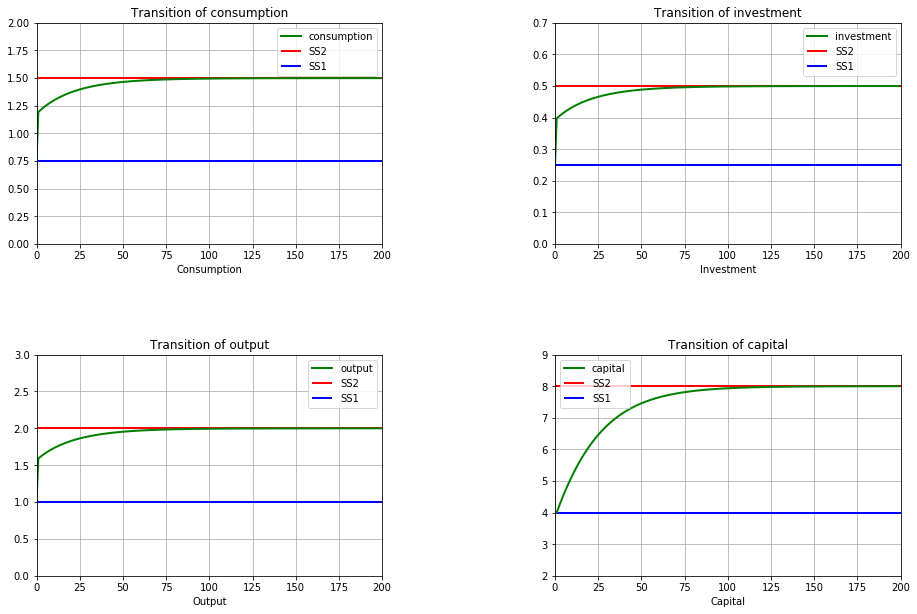

In [7]:
# Transition. Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.
import sympy as sy
from numpy import *
import math
import matplotlib.pyplot as plt

time=200
ka = empty(time)
ya = empty(time)
ca = empty(time)
ia = empty(time)

ka[0] = k1
ya[0] = y1
ca[0] = c1
ia[0] = i1

for t in range(time - 1):
    ka[t+1] = ya[t] - ca[t] + (1-delta)*ka[t]
    ya[t+1] = ka[t+1]**(1-theta)*(z2*h)**theta
    ca[t+1] = 0.75* ya[t+1]
    ia[t+1] = ya[t+1]-ca[t+1]
    
plt.figure(1)

plt.subplot(221)
t=range(time)
plt.plot(t,ca,label='consumption', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([0,2])
plt.xlabel('Time')
plt.xlabel('Consumption')
plt.grid(True)
plt.title('Transition of consumption')
plt.hlines(c2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(c1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()

plt.subplot(222)
t=range(time)
plt.plot(t,ia,label='investment', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([0,0.7])
plt.xlabel('Time')
plt.xlabel('Investment')
plt.grid(True)
plt.title('Transition of investment')
plt.hlines(i2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(i1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()

plt.subplot(223)
t=range(time)
plt.plot(t,ya,label='output', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([0,3])
plt.xlabel('Time')
plt.xlabel('Output')
plt.grid(True)
plt.title('Transition of output')
plt.hlines(y2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(y1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()

plt.subplot(224)
t=range(time)
plt.plot(t,ka,label='capital', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([2,9])
plt.xlabel('Time')
plt.xlabel('Capital')
plt.grid(True)
plt.title('Transition of capital')
plt.hlines(k2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(k1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()
plt.subplots_adjust(top=2, bottom=0.08, left=0, right=2, hspace=0.5, wspace=0.5)
    

The graphs suggest that consumption, output and investment adjust faster compared to capital. from the first steady state to the second steady state. This is plausible because capital even if investment increase quickly, it takes longer to build up physical capital. Moreover, we find that the level of steady for capital is double the inital steady state which is not the case for the other three variables.  

### Part d - Transitions with shocks

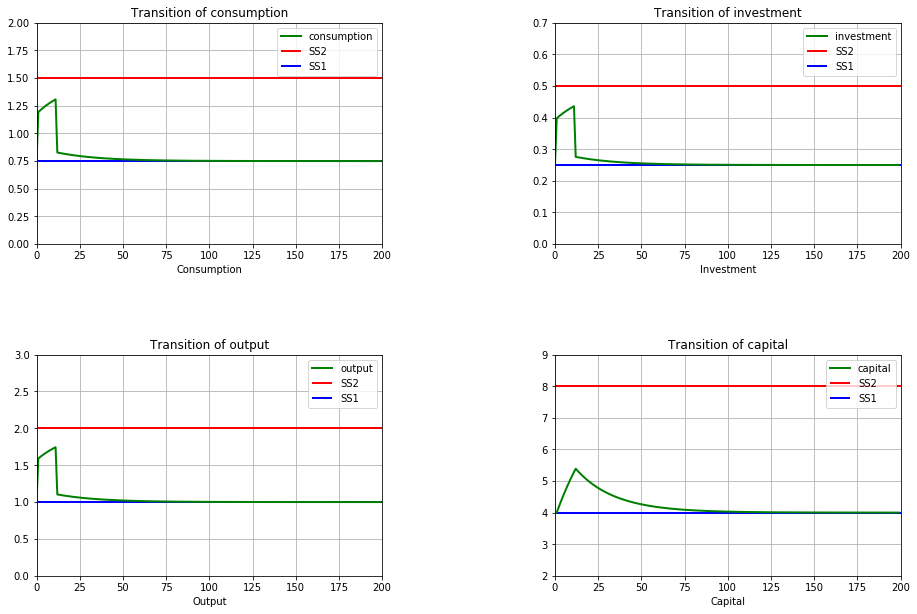

In [9]:
# Transition. Compute the transition from the first to the second steady state and report the time-path for savings, consumption, labor and output.
import sympy as sy
from numpy import *
import math
import matplotlib.pyplot as plt

time=200
ka = empty(time)
ya = empty(time)
ca = empty(time)
ia = empty(time)

ka[0] = k1
ya[0] = y1
ca[0] = c1
ia[0] = i1

for t in range(time - 1):
    ka[t+1] = ya[t] - ca[t] + (1-delta)*ka[t]
    ya[t+1] = ka[t+1]**(1-theta)*(z2*h)**theta
    ca[t+1] = 0.75* ya[t+1]
    ia[t+1] = ya[t+1]-ca[t+1]
    if t >=11:
        ka[t+1] = ya[t] - ca[t] + (1-delta)*ka[t]
        ya[t+1] = ka[t+1]**(1-theta)*(z1*h)**theta
        ca[t+1] = 0.75* ya[t+1]
        ia[t+1] = ya[t+1]-ca[t+1]
plt.figure(1)

plt.subplot(221)
t=range(time)
plt.plot(t,ca,label='consumption', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([0,2])
plt.xlabel('Time')
plt.xlabel('Consumption')
plt.grid(True)
plt.title('Transition of consumption')
plt.hlines(c2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(c1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()

plt.subplot(222)
t=range(time)
plt.plot(t,ia,label='investment', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([0,0.7])
plt.xlabel('Time')
plt.xlabel('Investment')
plt.grid(True)
plt.title('Transition of investment')
plt.hlines(i2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(i1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()

plt.subplot(223)
t=range(time)
plt.plot(t,ya,label='output', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([0,3])
plt.xlabel('Time')
plt.xlabel('Output')
plt.grid(True)
plt.title('Transition of output')
#plt.rcParams["figure.figsize"] = (2,1)
plt.hlines(y2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(y1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()

plt.subplot(224)
t=range(time)
plt.plot(t,ka,label='capital', c = 'green', linewidth=2.0)
plt.xlim([0,200])
plt.ylim([2,9])
plt.xlabel('Time')
plt.xlabel('Capital')
plt.grid(True)
plt.title('Transition of capital')
plt.hlines(k2, 0, 200, colors='red', label = 'SS2', linewidth=2.0)
plt.hlines(k1, 0, 200, colors='blue', label = 'SS1', linewidth=2.0)
plt.legend()
plt.subplots_adjust(top=2, bottom=0.08, left=0, right=2, hspace=0.5, wspace=0.5)
    

Since we shock the economy in period 11, we find that there is a kink in all four variables. 

## Exercise 2 - Two Period, Heterogenous Agent Economy

### General Equilibrium with Labor Supply, Uncertainty, and Progressive Labor Income Tax

#### Part a - We need to define the GE problem of the economy and plot the optimal solutions as a function of initial wealth.

##### Worked with Pau and Alena on this code

In [10]:
import numpy as np
from numpy import *
from scipy.optimize import *
from itertools import product
import matplotlib.pyplot as plt

random.seed(10)
#DISTRIBUTION OBJECT
eta=[1, 1.5, 2.5, 3]
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps = np.array(eps)
y0 = np.random.uniform(0.001,0.009,100)
for (i, item) in enumerate(y0):
    if 0.0055<item<0.0087:
        y0[i] = 0.001
y0=np.asarray(y0)
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps =np.array(eps)
Distri= list (product(eta,y0))

# SYSTEM OF EQUATIONS

# Solvem the system of equations for a specific rate of return and eta=1
solution1=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1
            r=0.65625
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution1.append(x)
    sol_mat=np.matrix(solution1)

assets_1=sol_mat[:,0]
c0_1=sol_mat[:,4]
c1_1=sol_mat[:,5]
h0_1=sol_mat[:,1]
h1_1=sol_mat[:,2]
sum(assets_1)

0.0007024643319665834

In [11]:
# Solvem the system of equations for a specific rate of return and eta=1.5
solution2=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1.5
            r=0.64333
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution2.append(x)
    sol_mat=np.matrix(solution2)

assets_2=sol_mat[:,0]
c0_2=sol_mat[:,4]
c1_2=sol_mat[:,5]
h0_2=sol_mat[:,1]
h1_2=sol_mat[:,2]
sum(assets_2)

0.0005435456608198667

In [12]:
# Solvem the system of equations for a specific rate of return and eta=2.5
solution3=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=2.5
            r=0.63345
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution3.append(x)
    sol_mat=np.matrix(solution3)

assets_3=sol_mat[:,0]
c0_3=sol_mat[:,4]
c1_3=sol_mat[:,5]
h0_3=sol_mat[:,1]
h1_3=sol_mat[:,2]
sum(assets_3)

0.0009995750463263758

In [13]:
# Solvem the system of equations for a specific rate of return and eta=3
solution4=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=3
            r=0.63104
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0
            T0=0
            T1=0
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution4.append(x)
    sol_mat=np.matrix(solution4)

assets_4=sol_mat[:,0]
c0_4=sol_mat[:,4]
c1_4=sol_mat[:,5]
h0_4=sol_mat[:,1]
h1_4=sol_mat[:,2]
sum(assets_4)

0.0006279916534611655

### Plot the graphs for Assets, Consumption today and consumption tomorrow.

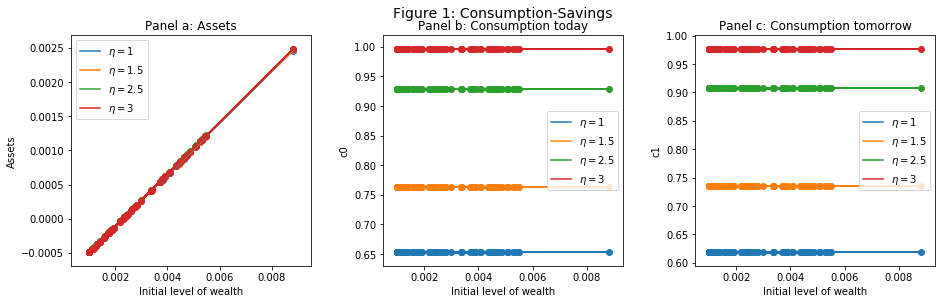

In [14]:
#PLOT
# Convert every output in an array
y0=np.asarray(y0)
assets_1=np.asarray(assets_1)
assets_2=np.asarray(assets_2)
assets_3=np.asarray(assets_3)
assets_4=np.asarray(assets_4)
c0_1=np.asarray(c0_1)
c0_2=np.asarray(c0_2)
c0_3=np.asarray(c0_3)
c0_4=np.asarray(c0_4)
c1_1=np.asarray (c1_1)
c1_2=np.asarray (c1_2)
c1_3=np.asarray (c1_3)
c1_4=np.asarray (c1_4)
h0_1=np.asarray(h0_1)
h0_2=np.asarray(h0_2)
h0_3=np.asarray(h0_3)
h0_4=np.asarray(h0_4)
h1_1=np.asarray(h1_1)
h1_2=np.asarray(h1_2)
h1_3=np.asarray(h1_3)
h1_4=np.asarray(h1_4)

plt.figure(1)
plt.suptitle('Figure 1: Consumption-Savings', x=1, y=1, fontsize=14)

plt.subplot(131)
plt.plot(y0, assets_1, label='$\eta=1$')
plt.plot(y0, assets_2, label='$\eta=1.5$')
plt.plot(y0, assets_3, label='$\eta=2.5$')
plt.plot(y0, assets_4, label='$\eta=3$')
plt.scatter(y0,assets_1)
plt.scatter(y0,assets_2)
plt.scatter(y0,assets_3)
plt.scatter(y0,assets_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('Assets')
plt.title('Panel a: Assets')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, c0_1, label='$\eta=1$')
plt.plot(y0, c0_2, label='$\eta=1.5$')
plt.plot(y0, c0_3, label='$\eta=2.5$')
plt.plot(y0, c0_4, label='$\eta=3$')
plt.scatter(y0,c0_1)
plt.scatter(y0,c0_2)
plt.scatter(y0,c0_3)
plt.scatter(y0,c0_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('c0')
plt.title('Panel b: Consumption today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(133)
plt.plot(y0, c1_1, label='$\eta=1$')
plt.plot(y0, c1_2, label='$\eta=1.5$')
plt.plot(y0, c1_3, label='$\eta=2.5$')
plt.plot(y0, c1_4, label='$\eta=3$')
plt.scatter(y0,c1_1)
plt.scatter(y0,c1_2)
plt.scatter(y0,c1_3)
plt.scatter(y0,c1_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('c1')
plt.title('Panel c: Consumption tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)
             
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

We solve for a system of four equations namely, the three Euler equations for consumption today, comnsumption tomorrow and assest. As well as the "no debt when you die" condition for period two. We find that for the different permanent productivity there isn't any significant difference in the level of asets. However, the consumption as expected differs for innate productivity. For us to compute the consumption for today and tomorrow, we include the budget constraint for the two periods in the system of equations as well. 

### Plot the savings rate 

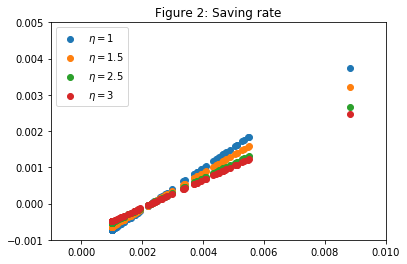

In [16]:
#Get the savings
#eta=1
savings_1=[]
for i in range(0,100) :
    eta=1
    s_1 = assets_1[i]/(y0[i]+eta*h0_1[i])
    savings_1.append(s_1)

#eta=1.5
savings_2=[]
for i in range(0,100) :
    eta=1.5
    s_2 = assets_2[i]/(y0[i]+eta*h0_2[i])
    savings_2.append(s_2)

#eta=2.5
savings_3=[]
for i in range(0,100) :
    eta=2.5
    s_3 = assets_3[i]/(y0[i]+eta*h0_3[i])
    savings_3.append(s_3)
    
#eta=3
savings_4=[]
for i in range(0,100) :
    eta=3
    s_4 = assets_4[i]/(y0[i]+eta*h0_4[i])
    savings_4.append(s_4)

#PLOT

#plt.plot(y0, savings_1, label='$\eta=1$')
#plt.plot(y0, savings_2, label='$\eta=1.5$')
#plt.plot(y0, savings_3, label='$\eta=2.5$')
#plt.plot(y0, savings_4, label='$\eta=3$')
plt.scatter(y0,savings_1, label='$\eta=1$')
plt.scatter(y0,savings_2, label='$\eta=1.5$')
plt.scatter(y0,savings_3,label='$\eta=2.5$')
plt.scatter(y0,savings_4, label='$\eta=3$')
plt.ylim([-0.001, 0.005])
plt.xlim([-0.001, 0.01])
plt.title('Figure 2: Saving rate')
plt.legend()


### Plot the optimal hours worked today and tomorrow

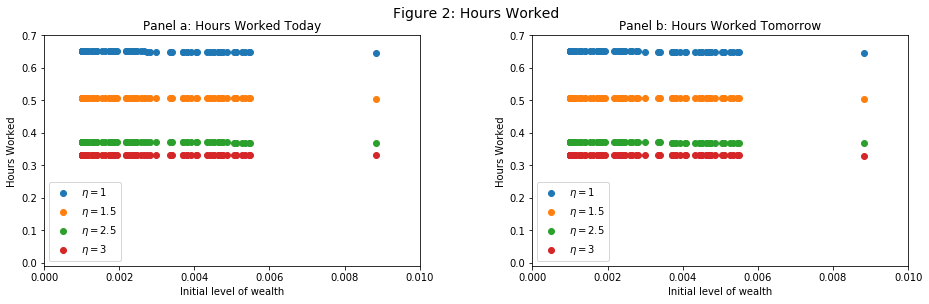

In [42]:
plt.figure(1)
plt.suptitle('Figure 2: Hours Worked', x=1, y=1, fontsize=14)

plt.subplot(121)
plt.scatter(y0, h0_1, label='$\eta=1$')
plt.scatter(y0, h0_2, label='$\eta=1.5$')
plt.scatter(y0, h0_3, label='$\eta=2.5$')
plt.scatter(y0, h0_4, label='$\eta=3$')
plt.ylim([-0.01, 0.7])
plt.xlim([0, 0.01])
plt.xlabel('Initial level of wealth')
plt.ylabel('Hours Worked')
plt.title('Panel a: Hours Worked Today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(122)
plt.scatter(y0, h1_1, label='$\eta=1$')
plt.scatter(y0, h1_2, label='$\eta=1.5$')
plt.scatter(y0, h1_3, label='$\eta=2.5$')
plt.scatter(y0, h1_4, label='$\eta=3$')
plt.ylim([-0.01, 0.7])
plt.xlim([0, 0.01])
plt.xlabel('Initial level of wealth')
plt.ylabel('Hours Worked')
plt.title('Panel b: Hours Worked Tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)


### Plot Labour Share for today and tomorrow

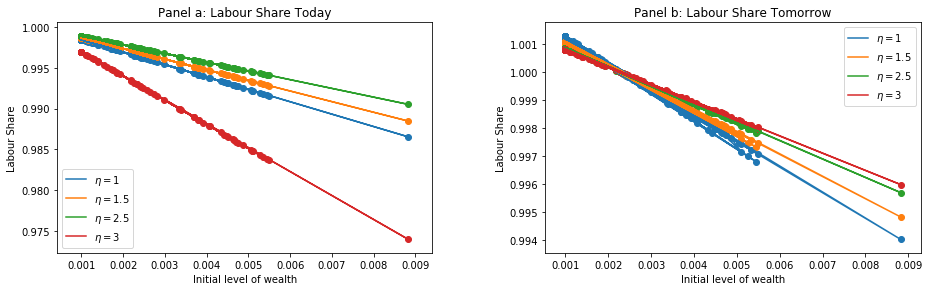

In [43]:
#Labour Share for today 
#eta=1
ls0_1=[]
for i in range(0,100) :
    eta=1
    tau=0
    T1 = 0 
    m1 = (eta*h0_1[i])*(1-tau)/((1-tau)*(eta)*h0_1[i] + y0[i] + T1)
    ls0_1.append(m1)

#eta=1.5
ls0_2=[]
for i in range(0,100) :
    eta=1.5
    tau=0
    T1 = 0
    m2 = (eta*h0_2[i])*(1-tau)/((1-tau)*(eta)*h0_2[i] + y0[i] + T1)
    ls0_2.append(m2)

#eta=2.5
ls0_3=[]
for i in range(0,100) :
    eta=2.5
    tau=0
    T1 = 0
    m3 = (eta*h0_3[i])*(1-tau)/((1-tau)*(eta)*h0_3[i] + y0[i] + T1)
    ls0_3.append(m3)
    
#eta=3
ls0_4=[]
for i in range(0,100) :
    eta=1
    tau=0
    T1 = 0
    m4 = (eta*h0_4[i])*(1-tau)/((1-tau)*(eta)*h0_4[i] + y0[i] + T1)
    ls0_4.append(m4)
    
#Labour Share for tomorrow 
#eta=1
ls1_1=[]
for i in range(0,100) :
    eta=1
    tau=0
    T2 = 0
    r = 0.65625
    m1_1 = ((eta + eps[i])*h1_1[i])*(1-tau)/((1-tau)*(eta + eps[i])*h1_1[i] + (1 + r)*assets_1[i] + T2)
    ls1_1.append(m1_1)

#eta=1.5
ls1_2=[]
for i in range(0,100) :
    eta=1.5
    tau=0
    T2 = 0
    r=0.64333
    m2_1 = ((eta + eps[i])*h1_2[i])*(1-tau)/((1-tau)*(eta + eps[i])*h1_2[i] + (1 + r)*assets_2[i] + T2)
    ls1_2.append(m2_1)

#eta=2.5
ls1_3=[]
for i in range(0,100) :
    eta=2.5
    tau=0
    T2 = 0
    r=0.63345
    m3_1 = ((eta + eps[i])*h1_3[i])*(1-tau)/((1-tau)*(eta + eps[i])*h1_3[i] + (1 + r)*assets_3[i] + T2)
    ls1_3.append(m3_1)
    
#eta=3
ls1_4=[]
for i in range(0,100) :
    eta=3
    tau=0
    T2 = 0
    r=0.63104
    m4_1 = ((eta + eps[i])*h1_4[i])*(1-tau)/((1-tau)*(eta + eps[i])*h1_4[i] + (1 + r)*assets_4[i] + T2)
    ls1_4.append(m4_1)
    
plt.subplot(121)
plt.plot(y0, ls0_1, label='$\eta=1$')
plt.plot(y0, ls0_2, label='$\eta=1.5$')
plt.plot(y0, ls0_3, label='$\eta=2.5$')
plt.plot(y0, ls0_4, label='$\eta=3$')
plt.scatter(y0, ls0_1)
plt.scatter(y0, ls0_2)
plt.scatter(y0, ls0_3)
plt.scatter(y0, ls0_4)
#plt.ylim([0.07, 1.5])
#plt.xlim([-0.008, 0.04])
plt.xlabel('Initial level of wealth')
plt.ylabel('Labour Share')
plt.title('Panel a: Labour Share Today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(122)
plt.plot(y0, ls1_1, label='$\eta=1$')
plt.plot(y0, ls1_2, label='$\eta=1.5$')
plt.plot(y0, ls1_3, label='$\eta=2.5$')
plt.plot(y0, ls1_4, label='$\eta=3$')
plt.scatter(y0, ls1_1)
plt.scatter(y0, ls1_2)
plt.scatter(y0, ls1_3)
plt.scatter(y0, ls1_4)
#plt.ylim([-0.01, 0.7])
#plt.xlim([0, 0.01])
plt.xlabel('Initial level of wealth')
plt.ylabel('Labour Share')
plt.title('Panel b: Labour Share Tomorrow')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)


### Plot Cosumption Growth and Income Growth

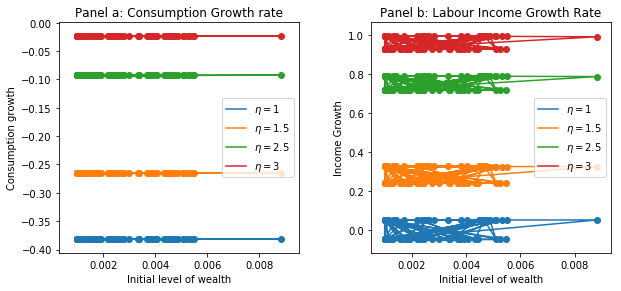

In [53]:
#Consumption Growth
#eta=1
cg1=[]
for i in range(0,100) :
    c1 = c1_1[i] - c0_1[i]/c0_1[i]
    cg1.append(c1)

#eta=1.5
cg2=[]
for i in range(0,100) :
    c2 = c1_2[i] - c0_2[i]/c0_2[i]
    cg2.append(c2)

#eta=2.5
cg3=[]
for i in range(0,100) :
    c3 = c1_3[i] - c0_3[i]/c0_3[i]
    cg3.append(c3)
    
#eta=3
cg4=[]
for i in range(0,100) :
    c4 = c1_4[i] - c0_4[i]/c0_4[i]
    cg4.append(c4)
    
    
#Labour Growth
#eta=1
li_1=[]
ls_1=[]
for i in range(0,100) :
    eta=1
    li = eta*h0_1[i]
    ls=eta*h0_1[i]/(eta*h0_1[i]+y0[i])
    li_1.append(li)
    ls_1.append(ls)

#eta=1.5
li_2=[]
ls_2=[]
for i in range(0,100) :
    eta=1.5
    li = eta*h0_2[i]
    ls=eta*h0_2[i]/(eta*h0_2[i]+y0[i])
    li_2.append(li)
    ls_2.append(ls)

#eta=2.5
li_3=[]
ls_3=[]
for i in range(0,100) :
    eta=2.5
    li = eta*h0_3[i]
    ls=eta*h0_3[i]/(eta*h0_3[i]+y0[i])
    li_3.append(li)
    ls_3.append(ls)
    
#eta=3
li_4=[]
ls_4=[]
for i in range(0,100) :
    eta=3
    li = eta*h0_4[i]
    ls=eta*h0_4[i]/(eta*h0_4[i]+y0[i])
    li_4.append(li)
    ls_4.append(ls)

#LABOR INCOME AND LABOR SHARE TOMORROW
#eta=1
LI_1=[]
LS_1=[]
for i in range(0,100) :
        eta=1
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_1.append(li)
        LS_1.append(ls)

#eta=1.5
LI_2=[]
LS_2=[]
for i in range(0,100) :
        eta=1.5
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_2.append(li)
        LS_2.append(ls)

#eta=2.5
LI_3=[]
LS_3=[]
for i in range(0,100) :
        eta=2.5
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_3.append(li)
        LS_3.append(ls)

#eta=3
LI_4=[]
LS_4=[]
for i in range(0,100) :
        eta=3
        li = (eta+eps[i])*h1_1[i]
        ls=(eta+eps[i])*h1_1[i]/((eta+eps[i])*h1_1[i]+y0[i])
        LI_4.append(li)
        LS_4.append(ls)


#eta=1
igrowth_1=[]
for i in range(0,100):
    gi=(LI_1[i]-li_1[i])/li_1[i]
    igrowth_1.append(gi)

#eta=1.5
igrowth_2=[]
for i in range(0,100):
    gi=(LI_2[i]-li_2[i])/li_2[i]
    igrowth_2.append(gi)

#eta=2.5
igrowth_3=[]
for i in range(0,100):
    gi=(LI_3[i]-li_3[i])/li_3[i]
    igrowth_3.append(gi)
    
#eta=3
igrowth_4=[]
for i in range(0,100):
    gi=(LI_4[i]-li_4[i])/li_4[i]
    igrowth_4.append(gi)
    
plt.subplot(131)
plt.plot(y0, cg1, label='$\eta=1$')
plt.plot(y0, cg2, label='$\eta=1.5$')
plt.plot(y0, cg3, label='$\eta=2.5$')
plt.plot(y0, cg4, label='$\eta=3$')
plt.scatter(y0, cg1)
plt.scatter(y0, cg2)
plt.scatter(y0, cg3)
plt.scatter(y0, cg4)
plt.xlabel('Initial level of wealth')
plt.ylabel('Consumption growth')
plt.title('Panel a: Consumption Growth rate')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, igrowth_1, label='$\eta=1$')
plt.plot(y0, igrowth_2, label='$\eta=1.5$')
plt.plot(y0, igrowth_3, label='$\eta=2.5$')
plt.plot(y0, igrowth_4, label='$\eta=3$')
plt.scatter(y0, igrowth_1)
plt.scatter(y0, igrowth_2)
plt.scatter(y0, igrowth_3)
plt.scatter(y0, igrowth_4)
plt.xlabel('Initial level of wealth')
plt.ylabel('Income Growth')
plt.title('Panel b: Labour Income Growth Rate')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)



## Assets, Consumption and Savings with Flat Tax rate

In [105]:
import numpy as np
from numpy import *
from scipy.optimize import *
from itertools import product
import matplotlib.pyplot as plt

random.seed(10)
#DISTRIBUTION OBJECT
eta=[1, 1.5, 2.5, 3]
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps = np.array(eps)
y0 = np.random.uniform(0.001,0.009,100)
for (i, item) in enumerate(y0):
    if 0.0055<item<0.0087:
        y0[i] = 0.001
y0=np.asarray(y0)
eps=np.random.choice([-0.05,0.05],size=100,p=[0.5,0.5])
eps =np.array(eps)
Distri= list (product(eta,y0))

# SYSTEM OF EQUATIONS

# Solvem the system of equations for a specific rate of return and eta=1
solution11=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1
            r=0.53211
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution11.append(x)
    sol_mat=np.matrix(solution11)

assets_11=sol_mat[:,0]
c0_11=sol_mat[:,4]
c1_11=sol_mat[:,5]
h0_11=sol_mat[:,1]
h1_11=sol_mat[:,2]
sum(assets_1)



0.008291271214712063

In [106]:
solution12=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=1.5
            r=0.5255
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution12.append(x)
    sol_mat=np.matrix(solution12)

assets_12=sol_mat[:,0]
c0_12=sol_mat[:,4]
c1_12=sol_mat[:,5]
h0_12=sol_mat[:,1]
h1_12=sol_mat[:,2]
sum(assets_2)



0.0037194279030489732

In [107]:
solution13=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=2.5
            r=0.525
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution13.append(x)
    sol_mat=np.matrix(solution13)

assets_13=sol_mat[:,0]
c0_13=sol_mat[:,4]
c1_13=sol_mat[:,5]
h0_13=sol_mat[:,1]
h1_13=sol_mat[:,2]
sum(assets_3)



0.007075975511895588

In [108]:
solution14=[]
for i in y0:
    for k in eps: 
        def GE(x):
            eta=3
            r=0.5265
            sigma=3
            kappa=4
            nu=4
            beta=0.99
            tau=0.115
            T0 = eta*tau*(1/100)
            T1 = (eta+k)*(1/100)
            a = x[0]
            h0 = x[1]
            h1 = x[2]
            lamda = x[3]
            c0 = x[4]
            c1 = x[5]


            F = empty((6))
            F[0]= np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)*(1-tau)*eta - kappa*np.power(h0,1/nu)
            F[1]= beta*np.power((((1-tau)*eta*h1)+(1+r)*a + T1), -sigma)*(1-tau)*eta - kappa*np.power(h1,1/nu)
            F[2]= beta*(np.power(((1-tau)*eta*h1)+(1+r)*a + T1,-sigma)*(1+r)) - lamda - np.power((1-tau)*eta*h0 + i + T0 -a, -sigma)
            F[3]= ((1-tau)*eta*h0 + i + T0 -a) + (1/(1+r))*((1-tau)*(eta+k)*h1 + (1+r)*a + T1) - i - (1+r)*(eta+k)*h1
            F[4]= (1-tau)*eta*h0 +i + T0 -a -c0
            F[5]= (1-tau)*(eta+k)*h1 + (1+r)*a + T1 - c1
            return F

    xGuess= np.array([0.05,0.1,0.1, 0.6, 0.8,0.95])
    x = fsolve(GE, xGuess) 

    solution14.append(x)
    sol_mat=np.matrix(solution14)

assets_14=sol_mat[:,0]
c0_14=sol_mat[:,4]
c1_14=sol_mat[:,5]
h0_14=sol_mat[:,1]
h1_14=sol_mat[:,2]
sum(assets_4)



0.00808913085725012

Text(0.5,1,'Panel c: Consumption tomorrow')

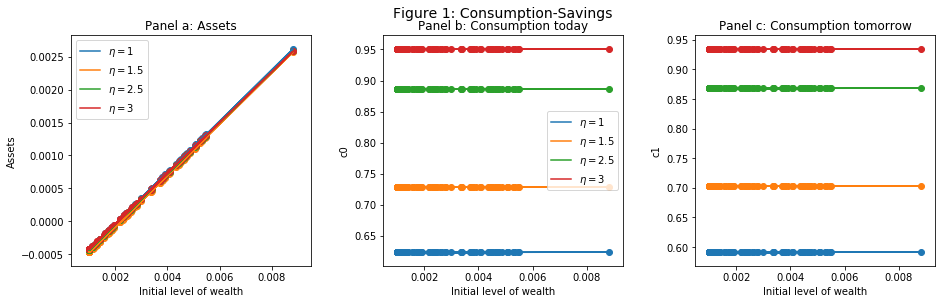

In [110]:
#PLOT
# Convert every output in an array
y0=np.asarray(y0)
assets_11=np.asarray(assets_11)
assets_12=np.asarray(assets_12)
assets_13=np.asarray(assets_13)
assets_14=np.asarray(assets_14)
c0_11=np.asarray(c0_11)
c0_12=np.asarray(c0_12)
c0_13=np.asarray(c0_13)
c0_14=np.asarray(c0_14)
c1_11=np.asarray (c1_11)
c1_12=np.asarray (c1_12)
c1_13=np.asarray (c1_13)
c1_14=np.asarray (c1_14)
h0_11=np.asarray(h0_11)
h0_12=np.asarray(h0_12)
h0_13=np.asarray(h0_13)
h0_14=np.asarray(h0_14)
h1_11=np.asarray(h1_11)
h1_12=np.asarray(h1_12)
h1_13=np.asarray(h1_13)
h1_14=np.asarray(h1_14)

plt.figure(1)
plt.suptitle('Figure 1: Consumption-Savings', x=1, y=1, fontsize=14)

plt.subplot(131)
plt.plot(y0, assets_11, label='$\eta=1$')
plt.plot(y0, assets_12, label='$\eta=1.5$')
plt.plot(y0, assets_13, label='$\eta=2.5$')
plt.plot(y0, assets_14, label='$\eta=3$')
plt.scatter(y0,assets_11)
plt.scatter(y0,assets_12)
plt.scatter(y0,assets_13)
plt.scatter(y0,assets_14)
plt.xlabel('Initial level of wealth')
plt.ylabel('Assets')
plt.title('Panel a: Assets')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(132)
plt.plot(y0, c0_11, label='$\eta=1$')
plt.plot(y0, c0_12, label='$\eta=1.5$')
plt.plot(y0, c0_13, label='$\eta=2.5$')
plt.plot(y0, c0_14, label='$\eta=3$')
plt.scatter(y0,c0_11)
plt.scatter(y0,c0_12)
plt.scatter(y0,c0_13)
plt.scatter(y0,c0_14)
plt.xlabel('Initial level of wealth')
plt.ylabel('c0')
plt.title('Panel b: Consumption today')
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=2, hspace=0.5, wspace=0.3)

plt.subplot(133)
plt.plot(y0, c1_11, label='$\eta=1$')
plt.plot(y0, c1_12, label='$\eta=1.5$')
plt.plot(y0, c1_13, label='$\eta=2.5$')
plt.plot(y0, c1_14, label='$\eta=3$')
plt.scatter(y0,c1_11)
plt.scatter(y0,c1_12)
plt.scatter(y0,c1_13)
plt.scatter(y0,c1_14)
plt.xlabel('Initial level of wealth')
plt.ylabel('c1')
plt.title('Panel c: Consumption tomorrow')